### Linear Regression

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load the data
df = pd.read_csv('C:/Users/TPMN/Downloads/Exercise-master/Adops & Data Scientist Sample Data - Q2 Regression.csv',header= None)
df.columns = ['A','B','C']

In [3]:
df.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [4]:
df.isna().sum()

A    0
B    0
C    0
dtype: int64

### Box plot

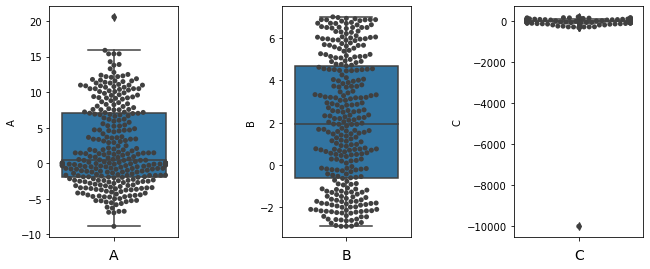

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.5, top=0.9, wspace=0.8, hspace=0.35)
plt.subplot(1, 3, 1) 
plt.xlabel("A", size=14)
sns.boxplot(y= df["A"])
sns.swarmplot(y= df["A"], color = ".25")

plt.subplot(1, 3, 2)
plt.xlabel("B", size=14)
sns.boxplot(y= df["B"])
sns.swarmplot(y= df["B"],color=".25")

plt.subplot(1, 3, 3)
plt.xlabel("C", size=14)
sns.boxplot(y= df["C"])
sns.swarmplot(y= df["C"],color=".25")


### 3D scatter

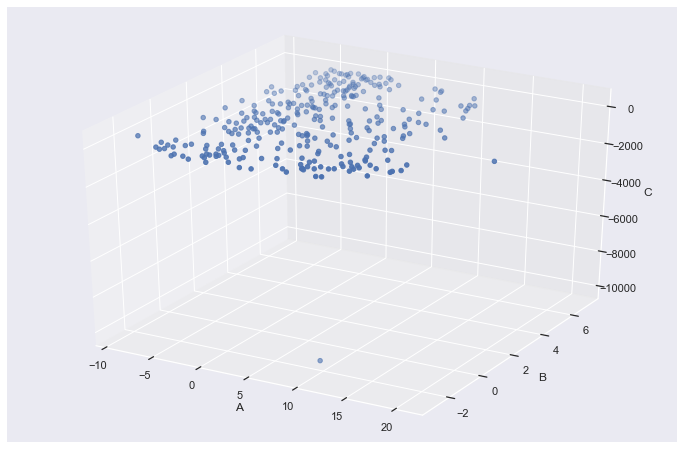

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection = '3d')

x = df['A']
y = df['B']
z = df['C']

ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_zlabel("C")

ax.scatter(x, y, z)

plt.show()

### Remove outlier using IQR

In [7]:
def remove_outlier_test(d_cp, column):
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data.values, 25)
    quan_75 = np.percentile(fraud_column_data.values, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr *1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    
    outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
    print(len(outlier_index))
    d_cp.drop(outlier_index, axis = 0, inplace=True)
    print(d_cp.shape)
    return d_cp

In [8]:
data = remove_outlier_test(df, "C")

53
(247, 3)


In [9]:
data = remove_outlier_test(df, "A")

3
(244, 3)


In [10]:
data = remove_outlier_test(df, "B")

0
(244, 3)


In [11]:
data.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [265]:
data.describe()

,A,B,C
count,244.000000,244.000000,244.000000
mean,0.537552,2.102670,-3.499080
std,4.249629,2.885981,27.988127
min,-8.860000,-2.890000,-82.200000
25%,-2.417500,-0.182500,-15.850000
50%,-0.223500,2.005000,-2.750000
75%,3.087500,4.567500,11.975000
max,11.800000,7.000000,75.100000


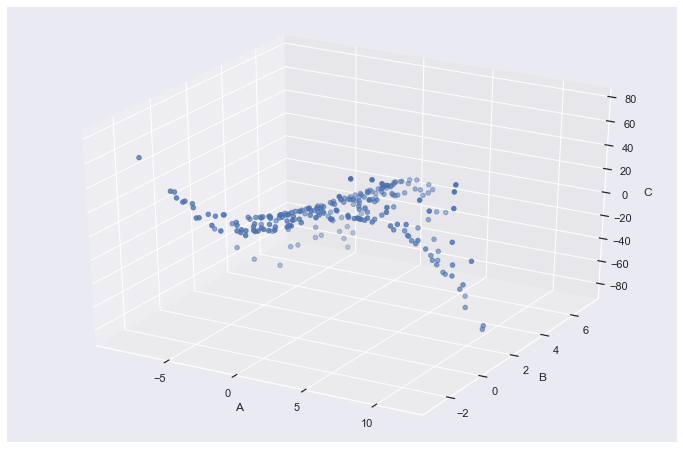

In [266]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection = '3d')

x = data['A']
y = data['B']
z = data['C']

ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_zlabel("C")

ax.scatter(x, y, z)

plt.show()

### Split train data and test data

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = data.drop('C', axis=1)
y = data['C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

### Scikit learn model Linear regression

In [268]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

y_predict = mlr.predict(X_test)

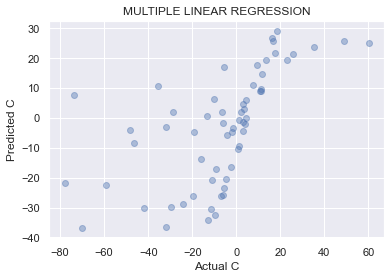

In [269]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual C")
plt.ylabel("Predicted C")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### Normalization(Robust, log, STD)

In [271]:
#정규화(normalization) 진행.
#총 세가지 scale로 진행. Robust, log, standard
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

rob_scaler = RobustScaler()
scaler = StandardScaler()

data['scaled_A'] = rob_scaler.fit_transform(data['A'].values.reshape(-1,1))
data['loged_A'] = np.log1p(data['A'].values.reshape(-1,1))
data['std_A'] = scaler.fit_transform(data['A'].values.reshape(-1,1))

In [272]:
data.head()

,A,B,C,scaled_A,loged_A,std_A
0,0.490,-0.18,11.50,0.129609,0.398776,-0.011213
1,-1.410,-1.23,11.80,-0.215531,NaN,-0.459230
2,0.943,4.51,-3.24,0.211898,0.664233,0.095604
3,3.570,5.07,-23.90,0.689101,1.519513,0.715046
4,-1.700,6.91,-22.10,-0.268211,NaN,-0.527611


In [273]:
data.drop(['loged_A','scaled_A','A'], axis = 1, inplace =True)

In [274]:
data.head()

,B,C,std_A
0,-0.18,11.50,-0.011213
1,-1.23,11.80,-0.459230
2,4.51,-3.24,0.095604
3,5.07,-23.90,0.715046
4,6.91,-22.10,-0.527611


In [275]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = data.drop('C', axis=1)
y = data['C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [276]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train) 

y_predict = mlr.predict(X_test)

In [277]:
print(mlr.score(X_train, y_train))

0.549787353076721
